In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(27)

# Data Generation

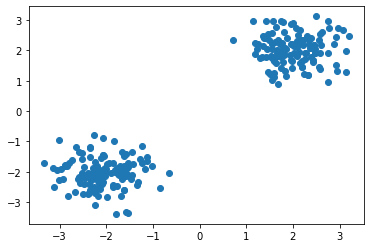

In [3]:
n_samples = 300
outliers_fraction = 0.15

#Number of outliers
n_outliers = int(outliers_fraction * n_samples)

#Normal points
n_inliers = n_samples - n_outliers

#Parameters for data generation
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)

#Two columns, one for each cluster
inlier_data =  make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0]

plt.scatter(inlier_data[:, 0], inlier_data[:, 1])

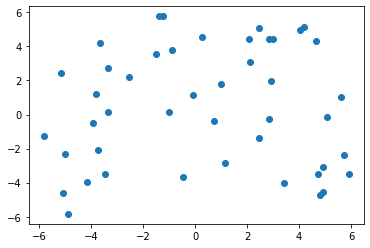

In [5]:
#Uniformly distributed
outlier_data = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))
plt.scatter(outlier_data[:, 0], outlier_data[:, 1])

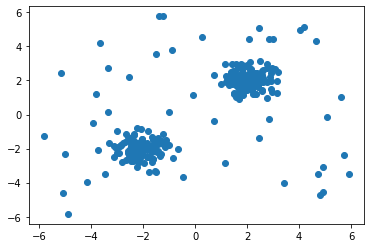

In [6]:
#Concatenate dataset
data = np.concatenate([inlier_data, outlier_data], axis=0)
plt.scatter(data[:, 0], data[:, 1])

# Outliers Detection

In [0]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### Elliptic Envelope

In [0]:
elip_env = EllipticEnvelope(random_state=0)
elip_env.fit(data)
y_pred=elip_env.predict(data)
# predict returns 1 for an inlier and -1 for an outlier

In [9]:
elip_env.predict([[-2, -2],[3, 3]])

array([1, 1])

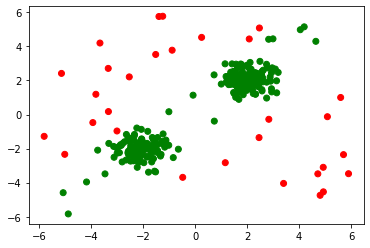

In [10]:
colors=np.array(['red','green'])
plt.scatter(data[:,0],data[:,1],c=colors[(y_pred+1) // 2])

In [11]:
cov.mahalanobis

NameError: ignored

### One Class SVM

In [0]:
one_class=svm.OneClassSVM(kernel='rbf',gamma='auto')
one_class.fit(data)
y_pred=one_class.predict(data)


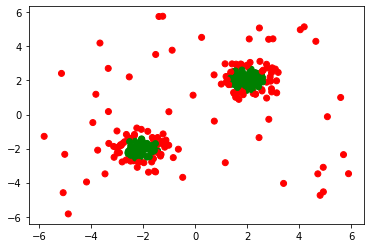

In [13]:
colors=np.array(['red','green'])
plt.scatter(data[:,0],data[:,1],c=colors[(y_pred+1) // 2])

### Isolation Forest

In [0]:
iso_forest=IsolationForest(random_state=0).fit(data)
y_pred=iso_forest.predict(data)

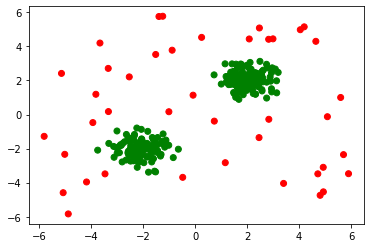

In [15]:
plt.scatter(data[:,0],data[:,1],c=colors[(y_pred+1) // 2])

### Local Outlier

In [0]:
loc_outlier = LocalOutlierFactor()
y_pred=loc_outlier.fit_predict(data)

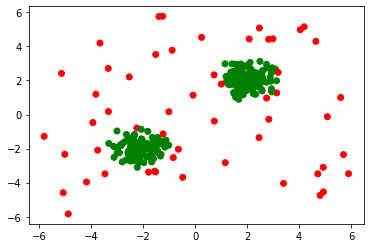

In [17]:
plt.scatter(data[:,0],data[:,1],c=colors[(y_pred+1) // 2])
